# **Обработка естественного языка методами машинного обучения**

##Пример 1. NLP в задаче классификации

Рассмотрим задачу обработки естественного языка (NLP — Natural Lanuage Processing) на примере классификации психического здоровья для определения депрессии по комментариям в Reddit.

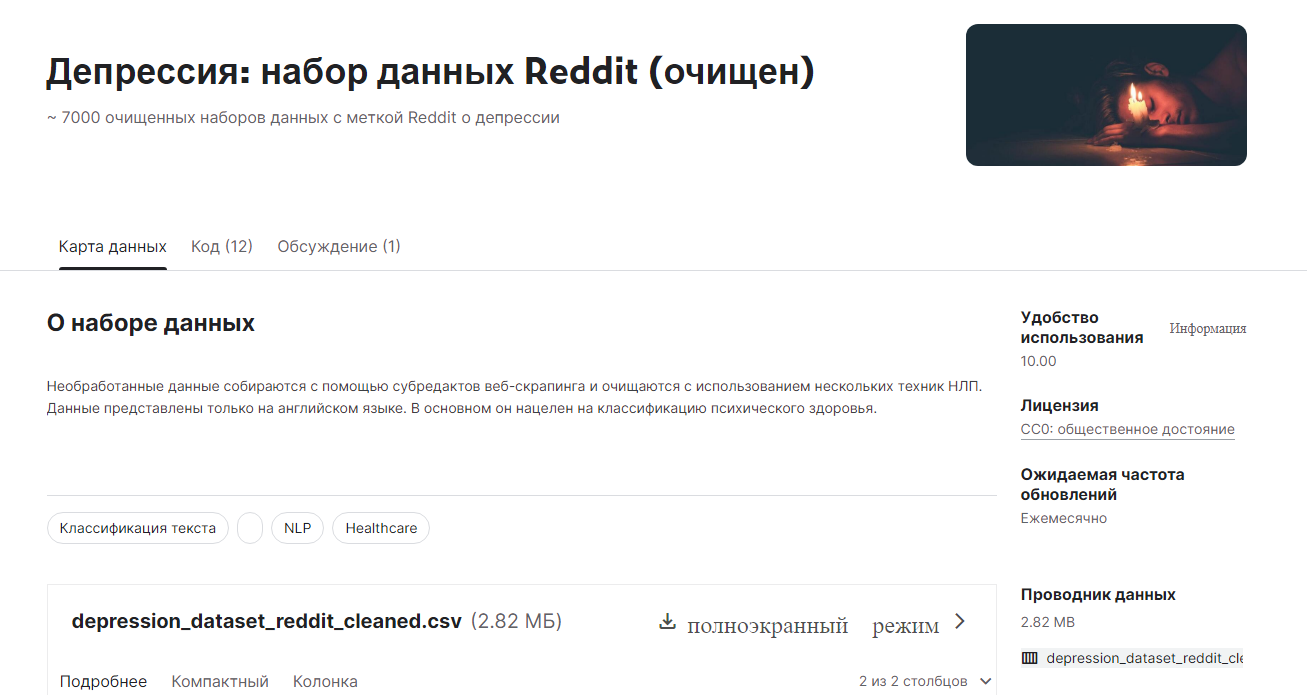

In [1]:
import pandas as pd
data_depression = pd.read_csv('depression_dataset_reddit_cleaned.csv')
data_depression

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [2]:
data_depression["clean_text"][0]

'we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually lead to either disappointment or disaster it usually work out quite differently here than when you say pm me anytime in a casual social context we have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content even more so because we know that so many of you are struggling yourselves we re hard at work behind the scene on more information and resource to make it easier to give and get quality help here this is just a small start our new wiki page explains in detail why it s much better to respond in public comment at least until you ve gotten to know someone it will be maintained at r depression wiki private contact and the full text of the current version is below summary anyone who while acting a a helper invite or accepts private contact i e pm chat

Диаграмма распределения по двум классам: депрессивное состояние и нет

<Axes: xlabel='is_depression', ylabel='count'>

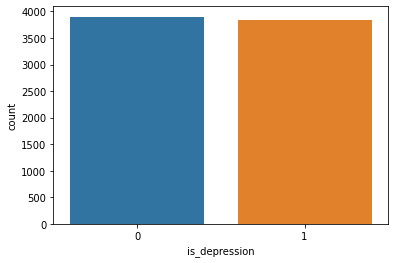

In [3]:
import seaborn as sns
sns.countplot(data=data_depression, x="is_depression")

Импортируем библиотеку NLTK, которая является ведущей для создания программ по обработке естественного языка на Python.

In [3]:
import nltk
#регулярные выражения
import re
from nltk.corpus import stopwords

In [4]:
nltk.download("stopwords") # поддерживает удаление стоп-слов
nltk.download('punkt') # делит текст на список предложений
nltk.download('wordnet') # проводит лемматизацию
nltk.download('omw-1.4') #для обработки новой структуры каталогов для wordnet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
new_text = []
lemmatize = nltk.WordNetLemmatizer()
for i in data_depression.clean_text:
    #удаляем неалфавитные символы
    text = re.sub("[^a-zA-Z]"," ",i) 
    # токенизируем слова
    text = nltk.word_tokenize(text,language = "english")
    # лемматирзируем слова
    text = [lemmatize.lemmatize(word) for word in i]
    # соединяем слова
    text = "".join(text)
    new_text.append(text)

In [6]:
new_text[:1]

['we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually lead to either disappointment or disaster it usually work out quite differently here than when you say pm me anytime in a casual social context we have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content even more so because we know that so many of you are struggling yourselves we re hard at work behind the scene on more information and resource to make it easier to give and get quality help here this is just a small start our new wiki page explains in detail why it s much better to respond in public comment at least until you ve gotten to know someone it will be maintained at r depression wiki private contact and the full text of the current version is below summary anyone who while acting a a helper invite or accepts private contact i e pm cha

In [7]:
# импортируем модуль
from sklearn.feature_extraction.text import CountVectorizer
#мешок слов
count = CountVectorizer(stop_words="english")
# проводим преобразование текста
matrix = count.fit_transform(new_text).toarray()


In [12]:
matrix.shape

(7731, 18529)

In [9]:
matrix

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
print(matrix[0][:400])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Формируем датасет для обучения и тестирования

In [10]:
X=matrix
y = data_depression["is_depression"].values
#Далее разделим выборку на тестовую и обучающую
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Используем метод машинного обучения "классификатор Байеса"

In [11]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
result_bayes = nb.fit(x_train, y_train)
nb.score(x_test,y_test)

0.8436520376175548

Рассмотрим метод машинного обучения "Логистическая регрессия"

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
result_logreg = logreg.fit(x_train, y_train)
logreg.score(x_test,y_test)

0.9565047021943573

Рассмотрим ансамблевый метод машинного обучения "Адаптивный бустинг"

In [13]:
#адаптивный бустинг

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

modelClf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.33, random_state = 42)

modelclf_fit = modelClf.fit(X_train, y_train)
modelClf.score(X_valid, y_valid)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9376959247648903

Рассмотрим применение многослойной нейронной сети прямого распрастранения для решения задачи классификации

In [14]:
from keras import models
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import optimizers

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
x_train.shape

(5179, 18529)

In [23]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0,2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=20,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/20
11/11 [==============================] - 3s 266ms/step - loss: 0.5693 - accuracy: 0.7005 - val_loss: 0.4735 - val_accuracy: 0.8899
Epoch 2/20
11/11 [==============================] - 4s 340ms/step - loss: 0.4129 - accuracy: 0.9357 - val_loss: 0.3602 - val_accuracy: 0.9353
Epoch 3/20
11/11 [==============================] - 3s 254ms/step - loss: 0.2958 - accuracy: 0.9691 - val_loss: 0.2696 - val_accuracy: 0.9506
Epoch 4/20
11/11 [==============================] - 3s 233ms/step - loss: 0.2052 - accuracy: 0.9747 - val_loss: 0.2088 - val_accuracy: 0.9534
Epoch 5/20
11/11 [==============================] - 2s 208ms/step - loss: 0.1420 - accuracy: 0.9786 - val_loss: 0.1681 - val_accuracy: 0.9549
Epoch 6/20
11/11 [==============================] - 2s 219ms/step - loss: 0.1004 - accuracy: 0.9811 - val_loss: 0.1486 - val_accuracy: 0.9545
Epoch 7/20
11/11 [==============================] - 6s 546ms/step - loss: 0.0733 - accuracy: 0.9855 - val_loss: 0.1368 - val_accuracy: 0.9557
Epoch 

In [24]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
import matplotlib.pyplot as plt

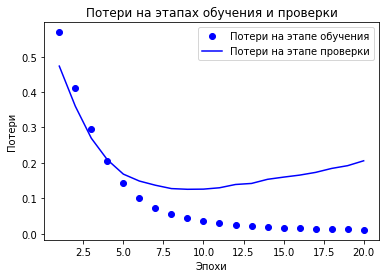

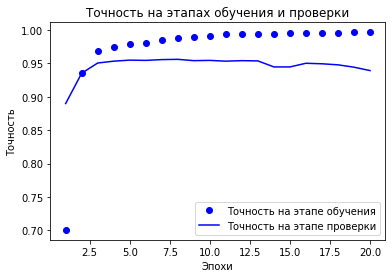

In [25]:
# построение графика потери на этапах проверки и обучения
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy'])+1)

# построение графика потери на этапах проверки и обучения
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy'])+1)

plt.plot(epochs, loss_values, 'bo', label = 'Потери на этапе обучения')
plt.plot(epochs, val_loss_values, 'b', label = 'Потери на этапе проверки')
plt.title('Потери на этапах обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

# построение графика точности на этапах обучения и проверки
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Точность на этапе обучения')
plt.plot(epochs, val_acc_values, 'b', label = 'Точность на этапе проверки')
plt.title('Точность на этапах обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [26]:
Y_pred=model.predict(x_test)
# задаем порог 0,5 для классификации текста
Y_pred=(Y_pred>=0.5).astype("int")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))
print(confusion_matrix(y_test,Y_pred))

80/80 [==============================] - 2s 16ms/step
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1297
           1       0.93      0.95      0.94      1255

    accuracy                           0.94      2552
   macro avg       0.94      0.94      0.94      2552
weighted avg       0.94      0.94      0.94      2552

[[1203   94]
 [  61 1194]]


##Задание
1. Найти текстовый датасет для задачи классификации. Решить ее одним методом классического машинного обучения и методом глубокого обучения на основе нейронных сетей.

Обратитите внимание: при решении задачи классификации более чем на 2 класса необходимо последний слой НС model.add(layers.Dense(1, activation = 'sigmoid')) заменить на model.add(layers.Dense(кол-во классов, activation = 'softmax')) и для выходных значений применить метод to_categorical

##Пример 2. Генерация текста по словам

Языковая модель может предсказать вероятность следующего слова в последовательности, основываясь на словах, уже наблюдаемых в последовательности.

В качестве исходного текста рассмотрим труды греческого философа Платона "Республика" (файл republic_clean.txt содержит около 15802 строк текста).

На вход модели будут подаваться 50 слов, а она будет предстказывать 51. Учитывая данный факт нужно правильно представить датасет.

Нам нужно преобразовать необработанный текст в последовательность токенов или слов.

In [1]:
import string

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

На первом этапе необходимо выполнить предобработку текста, которая включает себя:
1. Разделение текста на слова (подстроки) по разделителю пробел
2. Удаление знаков препинания
3. Оставить только те слова, которые состоят из букв, т.е. правильные алфавитные слова.     
4. Перевести все слова в нижний регистр

In [2]:
# turn a doc into clean tokens
def clean_doc(doc):
	# replace '--' with a space ' '
	doc = doc.replace('--', ' ')
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# make lower case
	tokens = [word.lower() for word in tokens]
	return tokens

In [3]:
# save tokens to file, one dialog per line
def save_doc(lines, filename):
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

In [4]:
# load document
in_filename = 'republic_clean.txt'
doc = load_doc(in_filename)
print(doc[:200])



BOOK I.

I went down yesterday to the Piraeus with Glaucon the son of Ariston,
that I might offer up my prayers to the goddess (Bendis, the Thracian
Artemis.); and also because I wanted to see in what


In [ ]:
!pip install wordcloud


In [6]:
from wordcloud import WordCloud, STOPWORDS

wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(doc)

<Axes: >

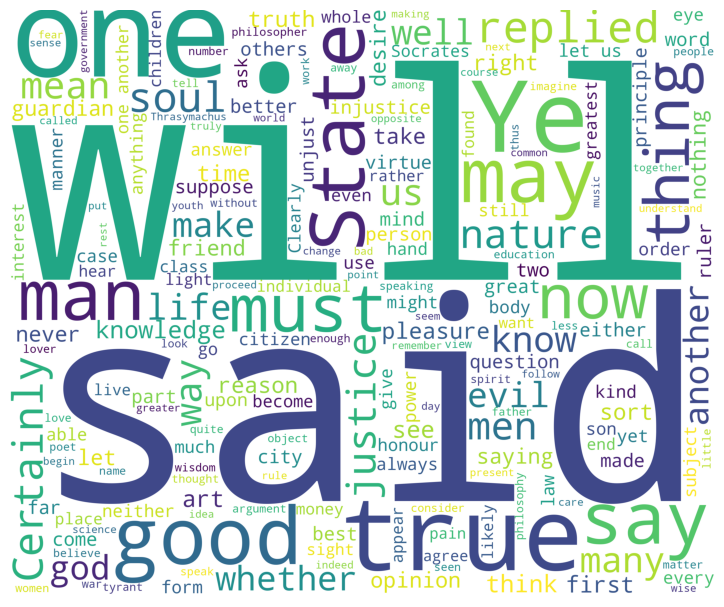

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [8]:
# clean document
tokens = clean_doc(doc)
print(tokens[:200])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

['book', 'i', 'i', 'went', 'down', 'yesterday', 'to', 'the', 'piraeus', 'with', 'glaucon', 'the', 'son', 'of', 'ariston', 'that', 'i', 'might', 'offer', 'up', 'my', 'prayers', 'to', 'the', 'goddess', 'bendis', 'the', 'thracian', 'artemis', 'and', 'also', 'because', 'i', 'wanted', 'to', 'see', 'in', 'what', 'manner', 'they', 'would', 'celebrate', 'the', 'festival', 'which', 'was', 'a', 'new', 'thing', 'i', 'was', 'delighted', 'with', 'the', 'procession', 'of', 'the', 'inhabitants', 'but', 'that', 'of', 'the', 'thracians', 'was', 'equally', 'if', 'not', 'more', 'beautiful', 'when', 'we', 'had', 'finished', 'our', 'prayers', 'and', 'viewed', 'the', 'spectacle', 'we', 'turned', 'in', 'the', 'direction', 'of', 'the', 'city', 'and', 'at', 'that', 'instant', 'polemarchus', 'the', 'son', 'of', 'cephalus', 'chanced', 'to', 'catch', 'sight', 'of', 'us', 'from', 'a', 'distance', 'as', 'we', 'were', 'starting', 'on', 'our', 'way', 'home', 'and', 'told', 'his', 'servant', 'to', 'run', 'and', 'bid',

In [12]:
import nltk
from nltk.probability import FreqDist
text = nltk.Text(tokens)
fdist = FreqDist(text)
fdist.most_common(5)


[('the', 7085), ('and', 5753), ('of', 4664), ('to', 3296), ('is', 2512)]

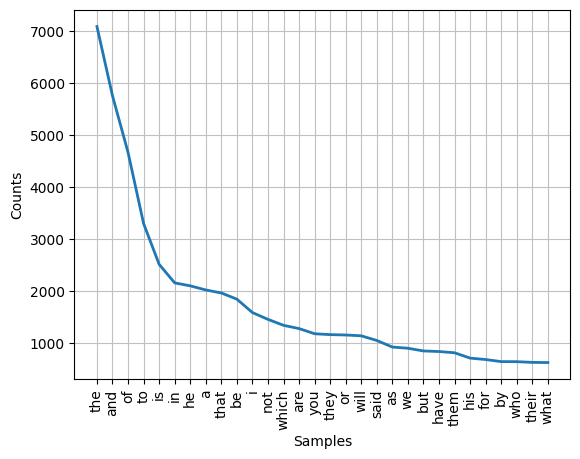

<Axes: xlabel='Samples', ylabel='Counts'>

In [13]:
fdist.plot(30,cumulative=False)

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = stopwords.words("english")

tokens = [word for word in tokens if not word in english_stopwords] 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


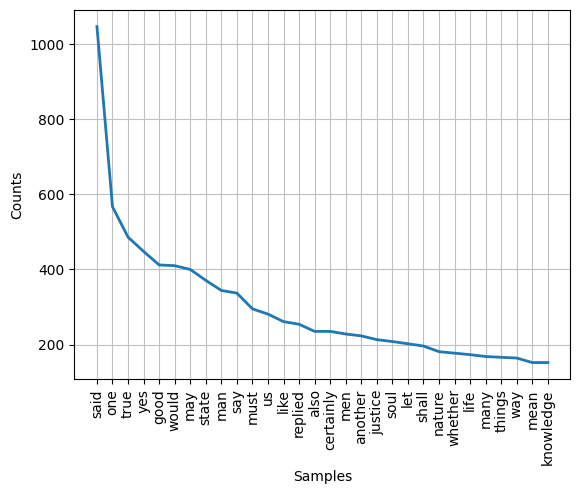

<Axes: xlabel='Samples', ylabel='Counts'>

In [17]:
text = nltk.Text(tokens)
fdist = FreqDist(text)
fdist.plot(30,cumulative=False)

In [18]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(tokens))

<Axes: >

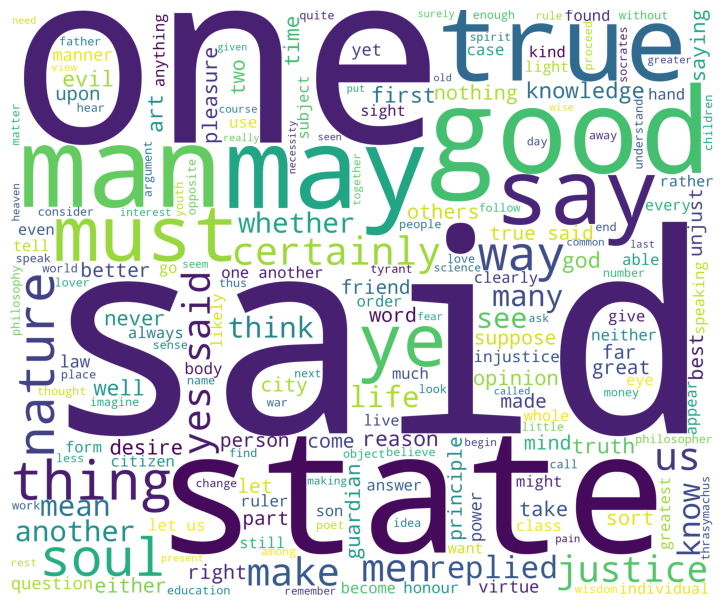

In [19]:
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

Преобразуем список токенов (слов) в последовательности из 51 слова (50 слов, подающихся на вход и 1 слово выходное)

In [20]:
# organize into sequences of tokens
length = 50 + 1
sequences = list()
for i in range(length, len(tokens)):
	# select sequence of tokens
	seq = tokens[i-length:i]
	# convert into a line
	line = ' '.join(seq)
	# store
	sequences.append(line)
print('Total Sequences: %d' % len(sequences))

# save sequences to file
out_filename = 'republic_sequences.txt'
save_doc(sequences, out_filename)

Total Sequences: 49306


Откройте файл republic_sequences в текстовом редакторе, вы увидите, что каждая строка сдвигается относительно предыдущей на одно слово. Это будет наш обучающий датасет.

In [21]:
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')

In [22]:
lines[:2]

['book went yesterday piraeus glaucon son ariston might offer prayers goddess bendis thracian artemis also wanted see manner would celebrate festival new thing delighted procession inhabitants thracians equally beautiful finished prayers viewed spectacle turned direction city instant polemarchus son cephalus chanced catch sight us distance starting way home told servant run',
 'went yesterday piraeus glaucon son ariston might offer prayers goddess bendis thracian artemis also wanted see manner would celebrate festival new thing delighted procession inhabitants thracians equally beautiful finished prayers viewed spectacle turned direction city instant polemarchus son cephalus chanced catch sight us distance starting way home told servant run bid']

Данные в нейронную сеть подаются в виде числовых последовательностей, поэтому необходимо закодировать полученные последовательности слов. 

Для этого используется класс Tokenizer, который позволяет выполнить векторизацию текстовых данных, превращая каждый элемент текста либо в последовательность целых чисел (где каждое целое число является индексом токена (лексемы) в словаре), либо в вектор,
в котором значение каждого токена может быть бинарным, либо представлено на основании метода “мешка слов”, либо на основании метода tf-idf.

In [23]:
# integer encode sequences of words
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
# получение уникальных токенов отсортированных по частоте повторяемости
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

In [24]:
sequences[:2]

[[927,
  925,
  7283,
  2748,
  115,
  164,
  2127,
  88,
  700,
  3942,
  2124,
  7282,
  7281,
  7280,
  16,
  1146,
  35,
  78,
  6,
  7279,
  1488,
  437,
  66,
  1145,
  3946,
  1296,
  3945,
  250,
  335,
  1741,
  3942,
  7278,
  3944,
  490,
  924,
  58,
  2747,
  410,
  164,
  1295,
  3943,
  2122,
  131,
  12,
  699,
  2746,
  28,
  573,
  334,
  923,
  597],
 [925,
  7283,
  2748,
  115,
  164,
  2127,
  88,
  700,
  3942,
  2124,
  7282,
  7281,
  7280,
  16,
  1146,
  35,
  78,
  6,
  7279,
  1488,
  437,
  66,
  1145,
  3946,
  1296,
  3945,
  250,
  335,
  1741,
  3942,
  7278,
  3944,
  490,
  924,
  58,
  2747,
  410,
  164,
  1295,
  3943,
  2122,
  131,
  12,
  699,
  2746,
  28,
  573,
  334,
  923,
  597,
  2749]]

In [25]:
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1
vocab_size

7284

Необходимо полученные закодированные последрвательности разделить на входные (50 значений на вход) и выходные данные (1 значение выходное).



In [26]:
# separate into input and output
import numpy as np
from keras.utils import to_categorical

sequences = np.array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
#кодирование выходных значений в двоичное матричное представление
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]

Создаем рекуррентную нейронную сеть для прогноза следующего слова. 

Слой Embedding  преобразовывает положительные целые числа (индексы) в плотные (dense) векторы фиксированного размера, например [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]. 

Этот слой может использоваться только как первый слой в модели.

In [27]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
# define model
model = Sequential()
#50 - это число выходов в Embedding слое
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            364200    
                                                                 
 lstm (LSTM)                 (None, 50, 100)           60400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 7284)              735684    
                                                                 
Total params: 1,250,784
Trainable params: 1,250,784
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, batch_size=128, epochs=20)

Epoch 1/20
386/386 [==============================] - 61s 134ms/step - loss: 7.8256 - accuracy: 0.0206
Epoch 2/20
386/386 [==============================] - 14s 36ms/step - loss: 7.5434 - accuracy: 0.0212
Epoch 3/20
386/386 [==============================] - 9s 23ms/step - loss: 7.4833 - accuracy: 0.0214
Epoch 4/20
386/386 [==============================] - 9s 22ms/step - loss: 7.4021 - accuracy: 0.0217
Epoch 5/20
386/386 [==============================] - 8s 20ms/step - loss: 7.3211 - accuracy: 0.0217
Epoch 6/20
386/386 [==============================] - 8s 20ms/step - loss: 7.2469 - accuracy: 0.0230
Epoch 7/20
386/386 [==============================] - 7s 17ms/step - loss: 7.1720 - accuracy: 0.0233
Epoch 8/20
386/386 [==============================] - 6s 14ms/step - loss: 7.0888 - accuracy: 0.0236
Epoch 9/20
386/386 [==============================] - 7s 18ms/step - loss: 7.0071 - accuracy: 0.0245
Epoch 10/20
386/386 [==============================] - 6s 16ms/step - loss: 6.9250 - acc

In [29]:
from pickle import dump
# save the model to file
model.save('model.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [30]:
from keras.utils import pad_sequences
import numpy as np
# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
	result = list()
	in_text = seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# truncate sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
		# predict probabilities for each word
		yhat = np.argmax(model.predict(encoded),axis=1)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
		result.append(out_word)
	return ' '.join(result)


In [31]:
# load cleaned text sequences
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

In [32]:
from keras.models import load_model
from pickle import load
# load the model
model = load_model('model.h5')
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

Формируем начальную строку на основе которой сеть будет генерить следующие слова. Выбираем ее случайным образом из входного текста.

In [33]:
from random import randint
# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

originate divisions actual governing power government united however small cannot moved true said way city moved manner two classes auxiliaries rulers disagree among one another shall manner homer pray muses tell us discord first arose shall imagine solemn mockery play jest us children address us lofty tragic vein making believe earnest



In [34]:
# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

1/1 [==============================] - 0s 24ms/step
would would another another state yes said said must make state state state state good state state good one one one state state state state good state state state state one one one state one one yes said said say whether say true said consider justice one another good yes


##Задание 
1. Измените количество эпох обучения представленной модели на 10, 50, 100 и посмотрите как измениться последовательность, которую генерит обученная модель. Также добавьте слой Dropout.  
2. Измените количество выходов в слое Embedding на 100, а затем на 300 посмотрите как это повляет на работу модели.
3. Возьмите фрагмент произведения автора, который вам нравиться и порпобуйте обучить модель генерить слова в его стиле. 

Для ускорения процесса обучения и работы данного ноутбука в Colab измените среду выполнения на GPU (в горизонтальном меню Среда выполнения - Сменить среду выполнения) 